# Diabetes Prediction

### Aim : To predict whether a person has diabetes or not using classification algorithms.

### Dataset link : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/

In [20]:

import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
import sklearn
import joblib

%matplotlib inline 

data = pd.read_csv(r"D:\Firespiko\diabetes_prediction_app\data\diabetes.csv")

display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Explore the data and note down the ranges for each column(helps in identifying outliers)

In [21]:
for i in data.columns:
    print("Range of the {} column is {} to {}".format(i,str(data[i].min()),str(data[i].max() - data[i].min())))

Range of the Pregnancies column is 0 to 17
Range of the Glucose column is 0 to 199
Range of the BloodPressure column is 0 to 122
Range of the SkinThickness column is 0 to 99
Range of the Insulin column is 0 to 846
Range of the BMI column is 0.0 to 67.1
Range of the DiabetesPedigreeFunction column is 0.078 to 2.342
Range of the Age column is 21 to 60
Range of the Outcome column is 0 to 1


## Preparing Data

In [22]:
#Filling missing values
for i in data.columns:
    print("The number of missing values of {} column is {}".format(i,data[i].isnull().sum()))


The number of missing values of Pregnancies column is 0
The number of missing values of Glucose column is 0
The number of missing values of BloodPressure column is 0
The number of missing values of SkinThickness column is 0
The number of missing values of Insulin column is 0
The number of missing values of BMI column is 0
The number of missing values of DiabetesPedigreeFunction column is 0
The number of missing values of Age column is 0
The number of missing values of Outcome column is 0


In [23]:
#Calculating the number of missing values in the dataset
print("The number of missing values in thickness column is: {} ".format((data['SkinThickness'] == 0).sum()))

print("The number of missing values in thickness column is: {} ".format((data['Insulin'] == 0).sum()))

The number of missing values in thickness column is: 227 
The number of missing values in thickness column is: 374 


In [24]:
#Replacing the missing values with 0

data['SkinThickness'].replace(to_replace = 0,value = data['SkinThickness'].mean(),inplace = True)
data['Insulin'].replace(to_replace = 0,value = data['Insulin'].mean(),inplace = True)

In [25]:
#Checking if the values are zero
print((data['SkinThickness'] == 0).sum())
print((data['Insulin'] == 0).sum())

0
0


In [26]:
print("Total number of people with diabetes is {}".format((data['Outcome'] == 1).sum()))
print("Total number of people not having diabetes is {}".format((data['Outcome'] == 0).sum()))
print("Percentage of people having diabetes is {}".format((data['Outcome'] == 1).sum()/data.shape[0]))
print("Odds of having diabetes is {}".format(((data['Outcome'] == 1).sum()/(data['Outcome'] == 0).sum())))

#Imbalanced dataset

Total number of people with diabetes is 268
Total number of people not having diabetes is 500
Percentage of people having diabetes is 0.3489583333333333
Odds of having diabetes is 0.536


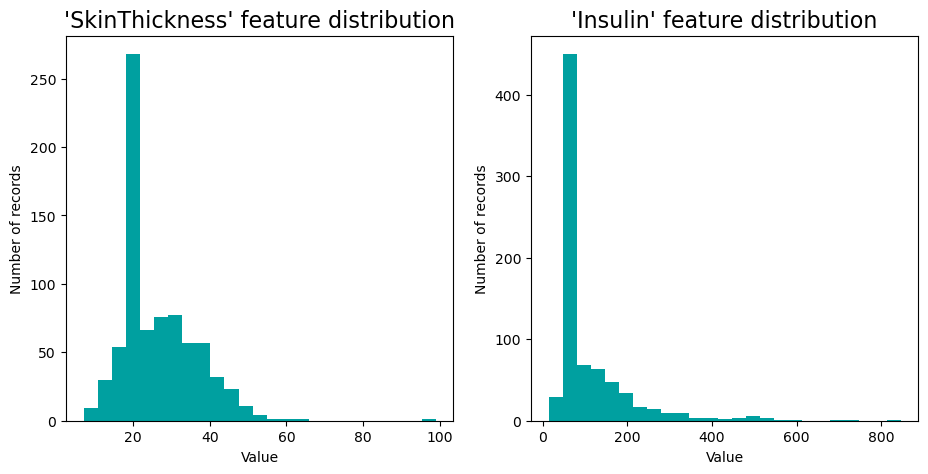

In [27]:
#Splitting the data
outcome_r = data['Outcome']
feature_r = data.drop(columns = ['Outcome'],axis = 1)

#Making a figure subplot
fig = plt.figure(figsize = (11,5))

for i,feature in enumerate(['SkinThickness','Insulin']):
    ax = fig.add_subplot(1,2,i+1)
    ax.hist(data[feature] , bins=25, color = '#00A0A0')
    ax.set_title("'{}' feature distribution".format(feature),fontsize = 16)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of records')

In [28]:
def distribution(data,transformed = False):
    """
    Function for visualising the data
    """
    fig = plt.figure(figsize = (11,5))
    
    for i,feature in enumerate(['SkinThickness','Insulin']):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.hist(data[feature] , bins = 25, color = '#00A0A0')
        ax.set_title("'{}' feature distribution".format(feature), fontsize = 16)
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of records')
        
    if transformed:
        fig.suptitle("Log transformed distribution",fontsize = 16,y = 1.03)
    else:
        fig.suptitle("Skewed distribution",fontsize = 16,y = 1.03)
    
    fig.tight_layout()
    fig.show()

C:\Users\KK COMPUTERS\AppData\Local\Temp\ipykernel_14984\2205794827.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


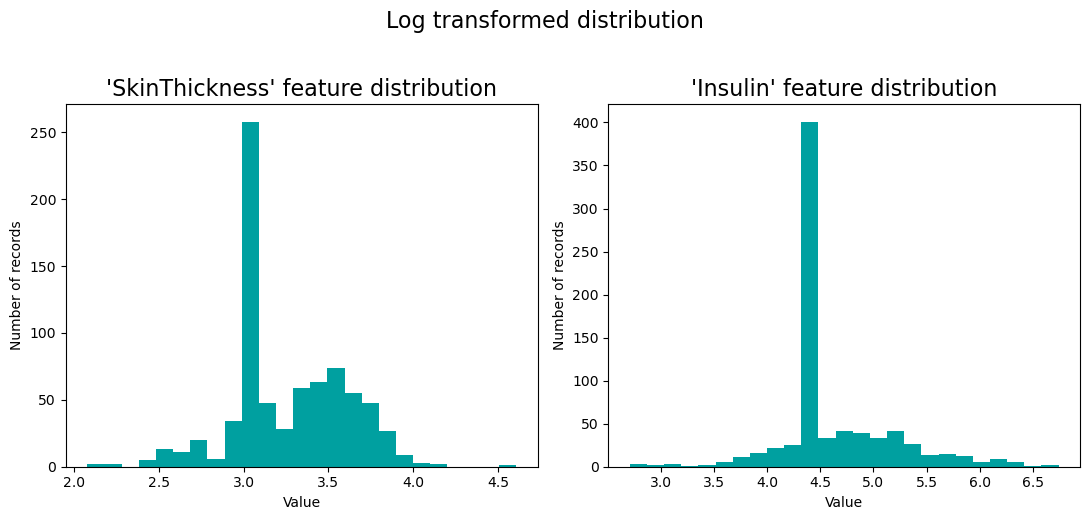

In [29]:
#Applying log transformation for skewed data

skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame(data = feature_r)
features_log_transformed[skewed] = feature_r[skewed].apply(lambda x: np.log(x + 1))

distribution(features_log_transformed,transformed = True)

In [30]:
from sklearn.preprocessing import MinMaxScaler

#Initializing the scaler
scaler = MinMaxScaler()
numerical = ['SkinThickness','Insulin','DiabetesPedigreeFunction']

features_log_min_max_transformed = pd.DataFrame(data = features_log_transformed)
features_log_min_max_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

#Example for displaying
display(features_log_min_max_transformed.head(5))
features_final = features_log_min_max_transformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features_final , outcome_r , test_size = 0.2 ,random_state = 42)

#print the no of training and testing data
print("No of data in traninig dataset is {}".format(x_train.shape[0]))
print("No of data in testing dataset is {}".format(x_test.shape[0]))

No of data in traninig dataset is 614
No of data in testing dataset is 154


In [32]:
from time import time
from sklearn.metrics import fbeta_score , accuracy_score

def fit_train_predict(learner, sample_size, x_train, x_test, y_train, y_test):
    
    result = {}
    
    #Start the timer and train the model on the given sample size of the data and store the timings in the result dictionary
    start = time()
    print("The timer has started")
    learner.fit(x_train[:sample_size],y_train[:sample_size])
    stop = time()
    print("The time has stopped")
    result['train_time'] = stop - start
    
    #Start the timer and train the model on the given sample size of the data and store the timings in the result dictionary
    
    start = time()
    print("The timer has started")
    predictions_test = learner.predict(x_test)
    predictions_train = learner.predict(x_train[:300]) #predicting the first 300 datapoints in the data
    stop = time()
    print("The time has stopped")
    result['pred_time'] = stop - start
    
    #compute accuracy on the first 300 datapoints / samples
    result['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    print("The accuracy score for training data of 300 sample points is : {}".format(result['acc_train']))
    
    #compute accuracy on the test data
    result['acc_test'] = accuracy_score(y_test,predictions_test)
    print("The accuracy score for testing data is : {}".format(result['acc_test']))
          
    
    #compute fscore on the training data
    result['f_train'] = fbeta_score(y_train[:300], predictions_train, pos_label = 1, average = "binary",beta = 0.5)
    print("The f score for training data of 300 sample points is : {}".format(result['f_train']))
    
    #compute f2score on the testing data
    result['f_test'] = fbeta_score(y_test, predictions_test, pos_label = 1, average = "binary",beta = 0.5)
    print("The f score for testing data is : {}".format(result['f_test']))
    
    print("Learner {} trained {} samples successfully".format(learner.__class__.__name__,sample_size))
    
    return results    

In [33]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



clfA = LogisticRegression(random_state = 42)
clfB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 5), random_state = 42)
clfC = RandomForestClassifier(n_estimators=100)
clfD = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

#Takes 100% of the data from the training sample
samples_100 = len(y_train)
sample_10 = int(0.1 * len(y_train))
sample_1 = int(0.01 * len(y_train))

results = {}

for clf in [clfA, clfB, clfC,clfD]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,samples in enumerate([sample_1, sample_10, samples_100]):
        results[clf_name][i] = fit_train_predict(clf, samples, x_train, x_test, y_train, y_test)


The timer has started
The time has stopped
The timer has started
The time has stopped
The accuracy score for training data of 300 sample points is : 0.5133333333333333
The accuracy score for testing data is : 0.461038961038961
The f score for training data of 300 sample points is : 0.3736920777279522
The f score for testing data is : 0.3342618384401114
Learner LogisticRegression trained 6 samples successfully
The timer has started
The time has stopped
The timer has started
The time has stopped
The accuracy score for training data of 300 sample points is : 0.73
The accuracy score for testing data is : 0.6948051948051948
The f score for training data of 300 sample points is : 0.6129032258064516
The f score for testing data is : 0.5719557195571956
Learner LogisticRegression trained 61 samples successfully
The timer has started


C:\Users\KK COMPUTERS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KK COMPUTERS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

The time has stopped
The timer has started
The time has stopped
The accuracy score for training data of 300 sample points is : 0.75
The accuracy score for testing data is : 0.7532467532467533
The f score for training data of 300 sample points is : 0.6458797327394209
The f score for testing data is : 0.6545454545454545
Learner LogisticRegression trained 614 samples successfully
The timer has started
The time has stopped
The timer has started
The time has stopped
The accuracy score for training data of 300 sample points is : 0.6466666666666666
The accuracy score for testing data is : 0.6168831168831169
The f score for training data of 300 sample points is : 0.4911591355599214
The f score for testing data is : 0.47457627118644063
Learner AdaBoostClassifier trained 6 samples successfully
The timer has started
The time has stopped
The timer has started
The time has stopped
The accuracy score for training data of 300 sample points is : 0.6933333333333334
The accuracy score for testing data i

In [35]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score


clf = XGBClassifier(random_state = 42)
clf2 = RandomForestClassifier(random_state = 42)

parameters = {'n_estimators':[20, 40, 60, 80, 100],'max_depth':[3, 6, 9, 12, 15]}

scorer = make_scorer(fbeta_score, beta = 0.5)
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf2, parameters, scoring = scorer)

grid_fit = grid_obj.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

predictions = clf.fit(x_train, np.array(y_train)).predict(x_test)

best_predictions = best_clf.predict(x_test)

print("XGB")
print("Unoptimised model accuracy: {}".format(accuracy_score(y_test,predictions)))
print("Unoptimised model f1 score: {}".format(fbeta_score(y_test,predictions, beta = 0.5)))
print("optimised model accuracy: {}".format(accuracy_score(y_test,best_predictions)))
print("optimised model f1 score: {}".format(fbeta_score(y_test,best_predictions, beta = 0.5)))

XGB
Unoptimised model accuracy: 0.7142857142857143
Unoptimised model f1 score: 0.6037151702786377
optimised model accuracy: 0.7662337662337663
optimised model f1 score: 0.6713780918727915


In [36]:
def feature_plot(importances, x_train, y_train):
    
    indices = np.argsort(importances)[::-1]
    columns = x_train.columns.values[indices[:5]]
    values = importances[:5]
    
    fig = plt.figure(figsize = (8,5))
    plt.title("Normalised weights for the first five features",fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align = "center", color = "#00A000", label = "Feature Weight")
    plt.bar(np.arange(5), np.cumsum(values), width = 0.2, align = "edge", color = "#00A0A0", label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.xlabel("Weight",fontsize = 12)
    plt.ylabel("Feature",fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

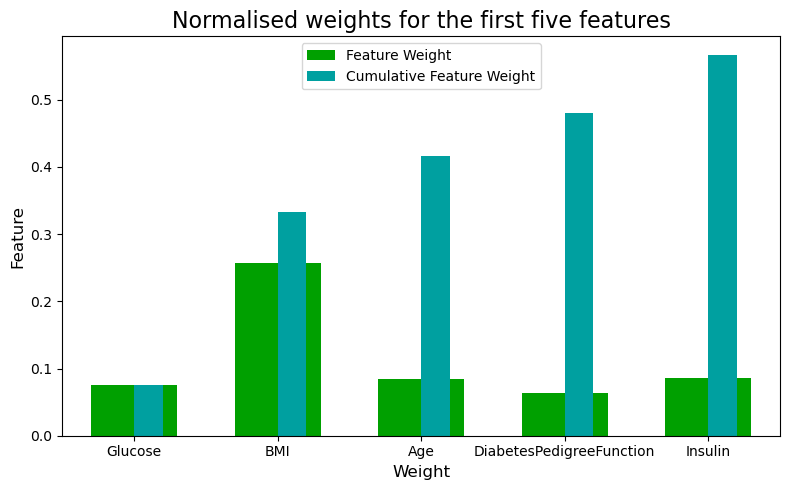

In [37]:
from xgboost import XGBClassifier

model = best_clf

importances = model.feature_importances_

feature_plot(importances, x_train, y_train)

In [38]:
from sklearn.base import clone

x_train_reduced = x_train[x_train.columns.values[(np.argsort(importances)[::-1])[:3]]]
x_test_reduced = x_test[x_test.columns.values[(np.argsort(importances)[::-1])[:3]]]

clf = (clone(best_clf)).fit(x_train_reduced,y_train)

reduced_predictions = clf.predict(x_test_reduced)

print("Final model trained on full data...")
print("The accuracy score is {}".format(accuracy_score(y_test,best_predictions)))
print("The F score is {}".format(fbeta_score(y_test,best_predictions,beta = 0.5)))
print("Final model trained on reduced data...")
print("The accuracy score is {}".format(accuracy_score(y_test,reduced_predictions)))
print("The F score is {}".format(fbeta_score(y_test,reduced_predictions,beta = 0.5)))

Final model trained on full data...
The accuracy score is 0.7662337662337663
The F score is 0.6713780918727915
Final model trained on reduced data...
The accuracy score is 0.7467532467532467
The F score is 0.6457564575645756


In [42]:
import joblib
# Save the trained model to a file
with open(r'D:\Firespiko\diabetes_prediction_app\Saved_models\randomfc.pkl','wb') as f1:
    joblib.dump(clf,f1)
